# FastAI2021-Intro

In [ ]:
%load_ext autoreload
%autoreload 2

## Vision Example

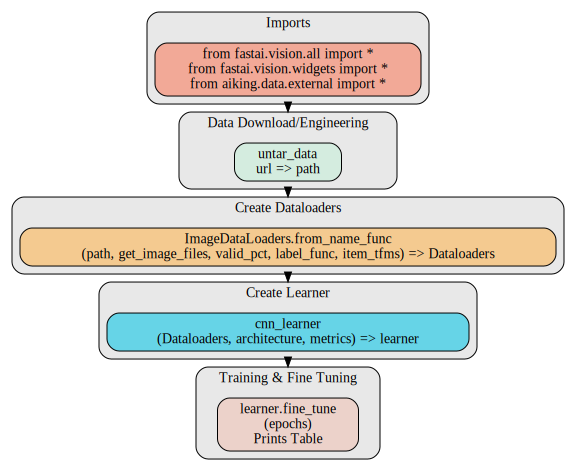

In [ ]:
from aiking.visuals import make_flowchart
blocks = ['Imports', 'Data Download/Engineering','Create Dataloaders', 'Create Learner', 'Training & Fine Tuning']

layers = ['from fastai.vision.all import *\n\
from fastai.vision.widgets import *\n\
from aiking.data.external import *', 
          'untar_data \n url => path',
          'ImageDataLoaders.from_name_func \n (path, get_image_files, valid_pct, label_func, item_tfms) => Dataloaders',
          'cnn_learner \n (Dataloaders, architecture, metrics) => learner',
          'learner.fine_tune \n (epochs) \n Prints Table']

make_flowchart(blocks, layers)

### Imports

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.text.all import *
from fastai.tabular.all import *
from fastai.collab import *
from aiking.data.external import * #We need to import this after fastai modules 
from fastdownload import FastDownload

2022-03-11 09:50:05.298431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 09:50:05.298470: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Data Download and Engineering

In [ ]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [ ]:
os.environ['AIKING_HOME']

'/Landmark2/pdo/aiking'

In [ ]:
d = FastDownload(base=os.environ['AIKING_HOME'], archive='archive', data='data')
d.get(URLs.PETS)

Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet')

In [ ]:
untar_data(URLs.PETS)

Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet')

In [ ]:
path = untar_data(URLs.PETS)/"images"; path

Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images')

In [ ]:
# !rm -rf  /content/drive/MyDrive/PPV/S_Personal_Study/aiking/archive

In [ ]:
# !rm -rf /content/drive/MyDrive/PPV/S_Personal_Study/aiking/archive/oxford-iiit-pet.tgz

In [ ]:
list_ds()

(#14) ['oxford-iiit-pet','DoppelGanger','mnist_sample','Bears','camvid_tiny','imdb','california-housing-prices','adult_sample','imdb_tok','ultra-mnist'...]

In [ ]:
path.ls()

(#7393) [Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_124.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/miniature_pinscher_195.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/British_Shorthair_54.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Persian_60.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/american_pit_bull_terrier_161.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/great_pyrenees_174.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Ragdoll_197.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/saint_bernard_65.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/pug_99.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_40.jpg')...]

### Create Dataloaders

In [ ]:
doc(get_image_files)

get_image_files [source] get_image_files ( path , recurse = True , folders = None ) 
 
 Get image files in path recursively, only in folders , if specified. 
 Show in docs

In [ ]:
def is_cat(x): return x[0].isupper()

imgname = path.ls()[0]
print(imgname,"|||", imgname.parts[-1])
imgname.parts[-1][0].isupper()

/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_124.jpg ||| Russian_Blue_124.jpg


True

In [ ]:
get_image_files(path), path.ls()

((#7390) [Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_124.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/miniature_pinscher_195.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/British_Shorthair_54.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Persian_60.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/american_pit_bull_terrier_161.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/great_pyrenees_174.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Ragdoll_197.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/saint_bernard_65.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/pug_99.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_40.jpg')...],
 (#7393) [Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/Russian_Blue_124.jpg'),Path('/Landmark2/pdo/aiking/data/oxford-iiit-pet/images/miniature_pinscher_195.jpg'),Path('/Landmark2/p

In [ ]:
doc(ImageDataLoaders.from_name_func)

ImageDataLoaders.from_name_func [source] ImageDataLoaders.from_name_func ( path , fnames , label_func , valid_pct = 0.2 , seed = None , item_tfms = None , batch_tfms = None , bs = 64 , val_bs = None , shuffle = True , device = None ) 
 
 Create from the name attrs of fnames in path s with label_func 
 Show in docs

In [ ]:
dls = ImageDataLoaders.from_name_func(path, 
                                      get_image_files(path), 
                                      valid_pct=0.2,
                                      seed=42,
                                      label_func=is_cat,
                                      item_tfms=Resize(224)); dls

### Create Learner

In [ ]:
doc(cnn_learner)

cnn_learner [source] cnn_learner ( dls , arch , normalize = True , n_out = None , pretrained = True , config = None , loss_func = None , opt_func = Adam , lr = 0.001 , splitter = None , cbs = None , metrics = None , path = None , model_dir = 'models' , wd = None , wd_bn_bias = False , train_bn = True , moms = (0.95, 0.85, 0.95) , cut = None , n_in = 3 , init = kaiming_normal_ , custom_head = None , concat_pool = True , lin_ftrs = None , ps = 0.5 , first_bn = True , bn_final = False , lin_first = False , y_range = None ) 
 
 Build a convnet style learner from dls and arch 
 Show in docs

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate); learn

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/rahul.saraf/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

### Training and Fine Tuning

In [ ]:
doc(learn.fine_tune)

Learner.fine_tune [source] Learner.fine_tune ( epochs , base_lr = 0.002 , freeze_epochs = 1 , lr_mult = 100 , pct_start = 0.3 , div = 5.0 , lr_max = None , div_final = 100000.0 , wd = None , moms = None , cbs = None , reset_opt = False ) 
 
 Fine tune with Learner.freeze for freeze_epochs , then with Learner.unfreeze for epochs , using discriminative LR. 
 Show in docs

In [ ]:
learn.fine_tune(1)

In [ ]:
uploader = widgets.FileUpload(); uploader

FileUpload(value={}, description='Upload')

In [ ]:
# !cat ~/anaconda3/envs/aiking/lib/python3.9/site-packages/fastai/vision/all.py

In [ ]:
img = PILImage.create(uploader.data[0])
img

IndexError: list index out of range

In [ ]:
doc(learn.predict)

Learner.predict [source] Learner.predict ( item , rm_type_tfms = None , with_input = False ) 
 
 Prediction on item , fully decoded, loss function decoded and probabilities 
 Show in docs

In [ ]:
prediction,_, probs = learn.predict(img)
print(f"Is this a cat?: {prediction}.")
print(f"Probability it's a cat: {probs}")

Is this a cat?: True.
Probability it's a cat: tensor([2.8618e-18, 1.0000e+00])


In [ ]:
prediction,_, probs = learn.predict(img)
print(f"Is this a cat?: {prediction}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Segmentation Example

Creating a model that can recognize the content of every individual pixel in an image is called segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY); path
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
); dls

learn = unet_learner(dls, resnet34); learn
learn.fine_tune(8)

In [ ]:
(path/"labels").ls()[0].stem

'Seq05VD_f02370_P'

In [ ]:
np.loadtxt(path/'codes.txt', dtype=str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

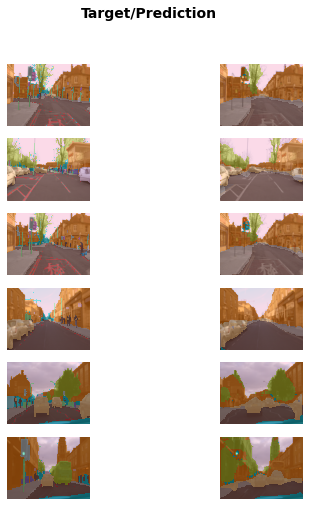

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
path

Path('/Landmark2/pdo/aiking/data/camvid_tiny')

## Text Example

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test'); dls
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy); learn
learn.fine_tune(4, 1e-2)

## Tabular Example

In [ ]:
doc(untar_data)

In [ ]:
path  = untar_data(URLs.ADULT_SAMPLE); path.ls()

(#3) [Path('/content/drive/MyDrive/PPV/S_Personal_Study/aiking/data/adult_sample/export.pkl'),Path('/content/drive/MyDrive/PPV/S_Personal_Study/aiking/data/adult_sample/adult.csv'),Path('/content/drive/MyDrive/PPV/S_Personal_Study/aiking/data/adult_sample/models')]

In [ ]:
df = pd.read_csv(path/'adult.csv'); df.head()

age          workclass  fnlwgt  ... hours-per-week  native-country salary
0   49            Private  101320  ...             40   United-States  >=50k
1   44            Private  236746  ...             45   United-States  >=50k
2   38            Private   96185  ...             32   United-States   <50k
3   38       Self-emp-inc  112847  ...             40   United-States  >=50k
4   42   Self-emp-not-inc   82297  ...             50   United-States   <50k

[5 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
doc(TabularDataLoaders.from_csv)

In [ ]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary', 
                                  cat_name=['workclass','education','marital-status',
                                            'occupation','relationship','race'], 
                                  cont_names=['age','fnlwgt','education-num'],
                                  procs = [Categorify, FillMissing, Normalize]
                                 );dls

In [ ]:
learn = tabular_learner(dls, metrics=accuracy); learn

In [ ]:
learn.fit_one_cycle(5)

## Colab Example

In [ ]:
path = untar_data(URLs.ML_SAMPLE); path.ls()

(#1) [Path('/content/drive/MyDrive/PPV/S_Personal_Study/aiking/data/movie_lens_sample/ratings.csv')]

In [ ]:
doc(CollabDataLoaders.from_csv)

In [ ]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5)) # y_range  : Range of y values
learn.fine_tune(10) # without a pretrained model

In [ ]:
learn.show_results()